In [2]:
import numpy as np
from scipy import *
import h5py
from pylab import *

In [3]:
######### location on TIGRESS: /tigress/jialiu/TNG_halo_cat_sbose/ ######

#### this is the location on NERSC #########
root = '/global/homes/j/jialiu/TNG_halo_cat_sbose/'
fn_hydro = root+'L205n2500TNG/HaloProfiles_z0.50_MegaExtended.hdf5'
fn_dmo = root+'L205n2500TNG_DMO/HaloProfiles_DMO_z0.50_MegaExtended.hdf5'
f_hydro = h5py.File(fn_hydro, 'r')
f_dmo = h5py.File(fn_dmo, 'r')

In [4]:
list(f_hydro.keys())

['Haloes']

In [5]:
dset_hydro = f_hydro.get('Haloes')
dset_dmo = f_dmo.get('Haloes')

In [6]:
for name in dset_hydro:
    print(name)

Cnfw
CoP
DMDenProfile
DMMassProfile
GroupNumber
HaloMassDM
LessRR200
LessRadius
M200
Mmean
Mvir
NumPartsDM
R200
RR200
R_Conv
Radius
Rhosnfw
Rmean
Rvir


In [8]:
############ hydro
rho_arr = dset_hydro['DMDenProfile'][:]
M200c_arr = dset_hydro['M200'][:]
R200c_arr = dset_hydro['R200'][:]
RR200c_arr = dset_hydro['RR200'][:] # RR200c the radial bin in units of R200c
x=RR200c_arr.reshape(1,-1)
cnfw_arr = dset_hydro['Cnfw'][:] ### R200c/r_s

############# dmo
rho_dmo_arr = dset_dmo['DMDenProfile'][:]
M200c_dmo_arr = dset_dmo['M200'][:]
R200c_dmo_arr = dset_dmo['R200'][:]
RR200c_dmo_arr = dset_dmo['RR200'][:]
x_dmo=RR200c_arr.reshape(1,-1)
cnfw_dmo_arr = dset_dmo['Cnfw'][:] ### R200c/r_s


In [9]:
print (rho_arr.shape)
print (M200c_arr.shape)
print (x.shape)

(71, 229834)
(229834,)
(1, 71)


In [10]:
rho_halo = lambda M200c, R200c: M200c/(4.0/3.0*pi*R200c**3)
Anfw = lambda cnfw: (log(1+cnfw)- cnfw/(1+cnfw))
rho_fun = lambda cnfw, M200c, R200c: rho_halo (M200c, R200c)/ (3*Anfw(cnfw) * x * (1.0/cnfw+x)**2)

In [11]:
rho_fit = rho_fun (cnfw_arr.reshape(-1,1), M200c_arr.reshape(-1,1), R200c_arr.reshape(-1,1)).T
rho_fit_dmo = rho_fun (cnfw_dmo_arr.reshape(-1,1), M200c_dmo_arr.reshape(-1,1), R200c_dmo_arr.reshape(-1,1)).T

print (rho_fit.shape)
print (rho_fit_dmo.shape)

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


(71, 229834)
(71, 248923)


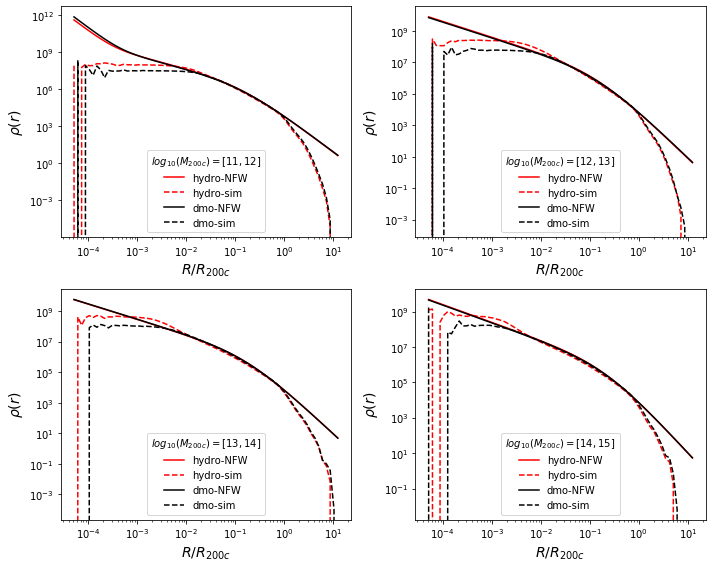

In [14]:
Mbins = arange(11, 16, 1)
seed(10)
figure(figsize=(10,8))
for i in range(len(Mbins)-1):
    subplot(2,2,i+1)
    idx=where((M200c_arr>10**Mbins[i]) & (M200c_arr<10**Mbins[i+1]))
    idx_dmo=where((M200c_dmo_arr>10**Mbins[i]) & (M200c_dmo_arr<10**Mbins[i+1]))
    icolor=rand(3)
    plot(RR200c_arr, nanmean(rho_fit.T[idx], axis=0), 'r-', label='hydro-NFW')
    plot(RR200c_arr, nanmean(rho_arr.T[idx], axis=0), 'r--', label='hydro-sim')
    plot(RR200c_dmo_arr, nanmean(rho_fit_dmo.T[idx_dmo], axis=0), 'k-', label='dmo-NFW')
    plot(RR200c_dmo_arr, nanmean(rho_dmo_arr.T[idx_dmo], axis=0), 'k--', label='dmo-sim')
    xscale('log')
    yscale('log')
    xlabel('$R/R_{200c}$', fontsize=14)
    ylabel(r'$\rho(r)$', fontsize=14)
    legend(title=r'$log_{10}(M_{200c})=[%i, %i]$'%(Mbins[i], Mbins[i+1]), loc='lower center')
plt.tight_layout()
show()

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


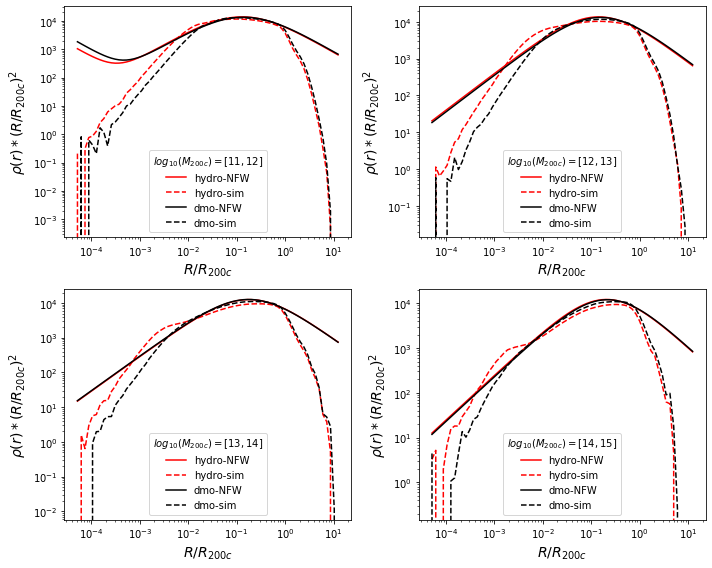

In [15]:
Mbins = arange(11, 16, 1)
seed(10)
figure(figsize=(10,8))
for i in range(len(Mbins)-1):
    subplot(2,2,i+1)
    idx=where((M200c_arr>10**Mbins[i]) & (M200c_arr<10**Mbins[i+1]))
    idx_dmo=where((M200c_dmo_arr>10**Mbins[i]) & (M200c_dmo_arr<10**Mbins[i+1]))
    icolor=rand(3)
    plot(RR200c_arr, RR200c_arr**2*nanmean(rho_fit.T[idx], axis=0), 'r-', label='hydro-NFW')
    plot(RR200c_arr, RR200c_arr**2*nanmean(rho_arr.T[idx], axis=0), 'r--', label='hydro-sim')
    plot(RR200c_dmo_arr, RR200c_dmo_arr**2*nanmean(rho_fit_dmo.T[idx_dmo], axis=0), 'k-', label='dmo-NFW')
    plot(RR200c_dmo_arr, RR200c_dmo_arr**2*nanmean(rho_dmo_arr.T[idx_dmo], axis=0), 'k--', label='dmo-sim')
    xscale('log')
    yscale('log')
    xlabel('$R/R_{200c}$', fontsize=14)
    ylabel(r'$\rho(r) * (R/R_{200c})^2$', fontsize=14)
    legend(title=r'$log_{10}(M_{200c})=[%i, %i]$'%(Mbins[i], Mbins[i+1]), loc='lower center')
plt.tight_layout()
show()